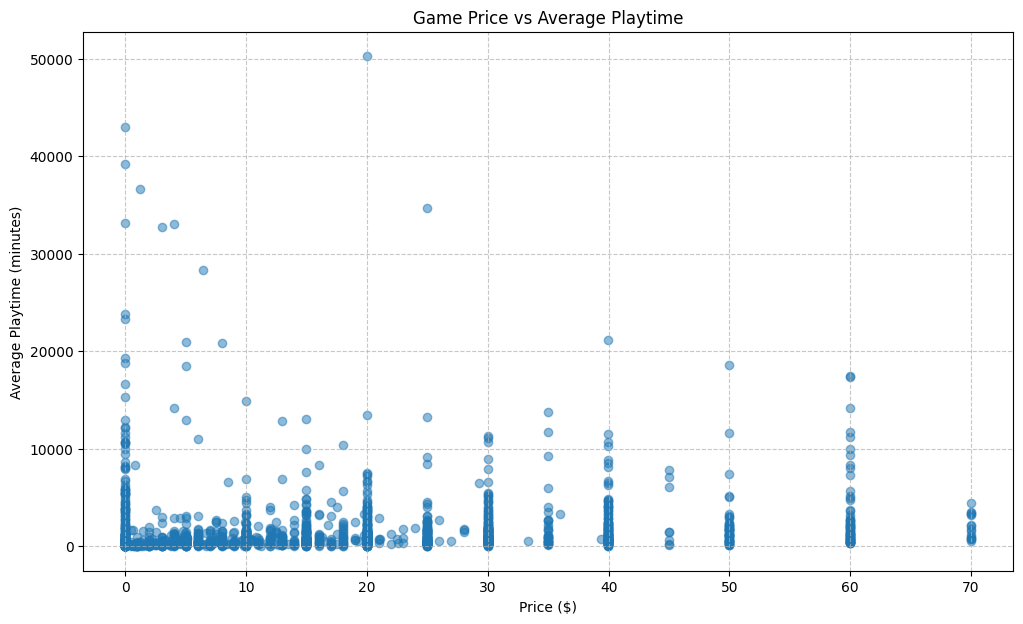

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('small_games_csv.csv')

# Create a scatter plot using matplotlib
import matplotlib.pyplot as plt

# Filter out rows where average_playtime_forever is greater than 50000 minutes
filtered_df = df[df['average_playtime_forever'] <= 55000]

plt.figure(figsize=(12, 7))
plt.scatter(filtered_df['price'], filtered_df['average_playtime_forever'], alpha=0.5)
plt.xlabel('Price ($)')
plt.ylabel('Average Playtime (minutes)')
plt.title('Game Price vs Average Playtime')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

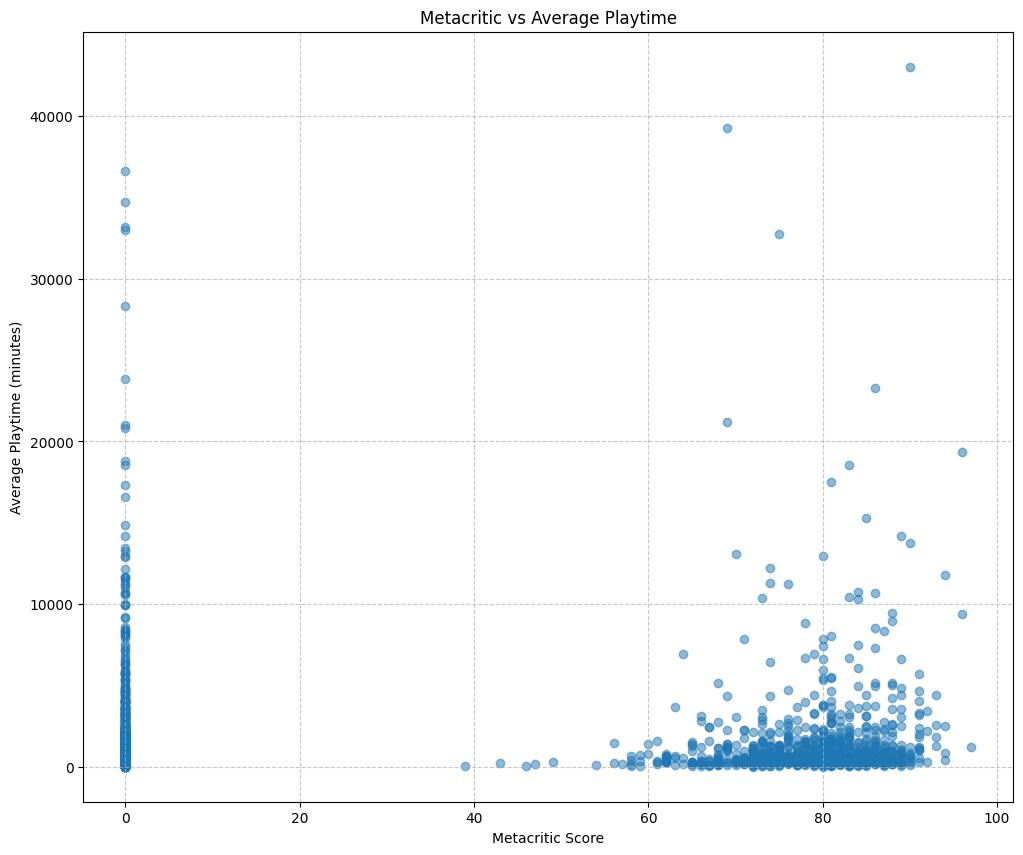

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('small_games_csv.csv')

# Create a scatter plot using matplotlib
import matplotlib.pyplot as plt

# Filter out rows where average_playtime_forever is greater than 50000 minutes
filtered_df = df[df['average_playtime_forever'] <= 50000]

plt.figure(figsize=(12, 10))
plt.scatter(filtered_df['metacritic_score'], filtered_df['average_playtime_forever'], alpha=0.5)
plt.xlabel('Metacritic Score')
plt.ylabel('Average Playtime (minutes)')
plt.title('Metacritic vs Average Playtime')

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

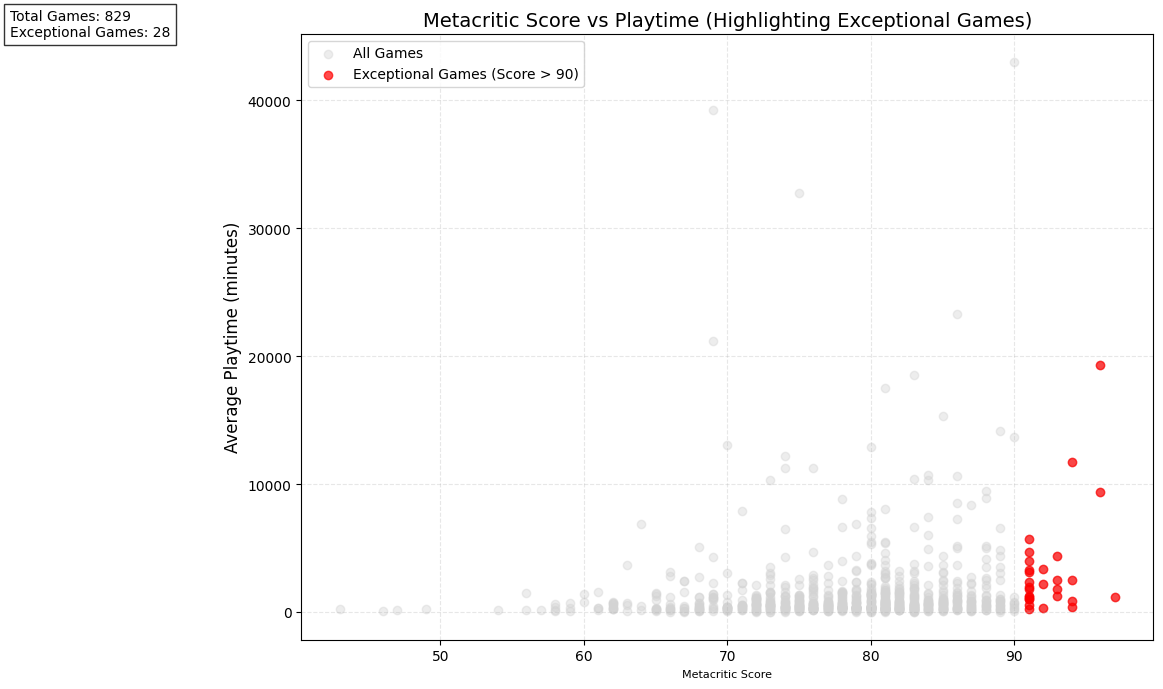

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('small_games_csv.csv')

# Filter out extreme playtimes and invalid scores
filtered_df = df[(df['average_playtime_forever'] <= 50000) &
                (df['metacritic_score'] > 40)]  # Only scores > 0

# Create figure
plt.figure(figsize=(12, 7))

# Plot all games in light gray
plt.scatter(filtered_df['metacritic_score'],
            filtered_df['average_playtime_forever'],
            color='lightgray',
            alpha=0.4,
            label='All Games')

# Highlight high-scoring games (score > 90)
high_score_games = filtered_df[filtered_df['metacritic_score'] > 90]
plt.scatter(high_score_games['metacritic_score'],
            high_score_games['average_playtime_forever'],
            color='red',
            alpha=0.7,
            label='Exceptional Games (Score > 90)')

# Customize plot
plt.xlabel('Metacritic Score', fontsize=8)
plt.ylabel('Average Playtime (minutes)', fontsize=12)
plt.title('Metacritic Score vs Playtime (Highlighting Exceptional Games)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend
plt.legend()

# Add text annotation for context
plt.text(20, 45000,
         f"Total Games: {len(filtered_df)}\nExceptional Games: {len(high_score_games)}",
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('small_games_csv.csv')

# Clean the data
# 1. Remove rows with missing or invalid Metacritic scores (0 or NaN)
df = df[df['metacritic_score'].notna() & (df['metacritic_score'] > 0)]

# 2. Filter extreme playtime outliers (keep ≤ 50,000 minutes)
df = df[df['average_playtime_forever'] <= 50000]

# Prepare features (X) and target (y)
x = df[['average_playtime_forever']]  # Playtime in minutes (as original)
y = df['metacritic_score']            # Target variable

In [ ]:
x

,average_playtime_forever
0,1206
1,19323
2,9387
3,11768
4,2511
...,...
826,269
827,143
828,73
829,222


In [ ]:
y

,metacritic_score
0,97
1,96
2,96
3,94
4,94
...,...
826,49
827,47
828,46
829,43


In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df[['average_playtime_forever']],  # Features (minutes)
    df['metacritic_score'],            # Target
    test_size=0.2,
    random_state=42
)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 664
Test samples: 166


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Interpret coefficients (in minutes)
print(f"Intercept (baseline score): {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.6f} (Metacritic points per minute of playtime)")

Intercept (baseline score): 78.08
Coefficient: 0.000260 (Metacritic points per minute of playtime)


Mean Squared Error: 67.16
R² Score: 0.02 (1.0 = perfect fit)


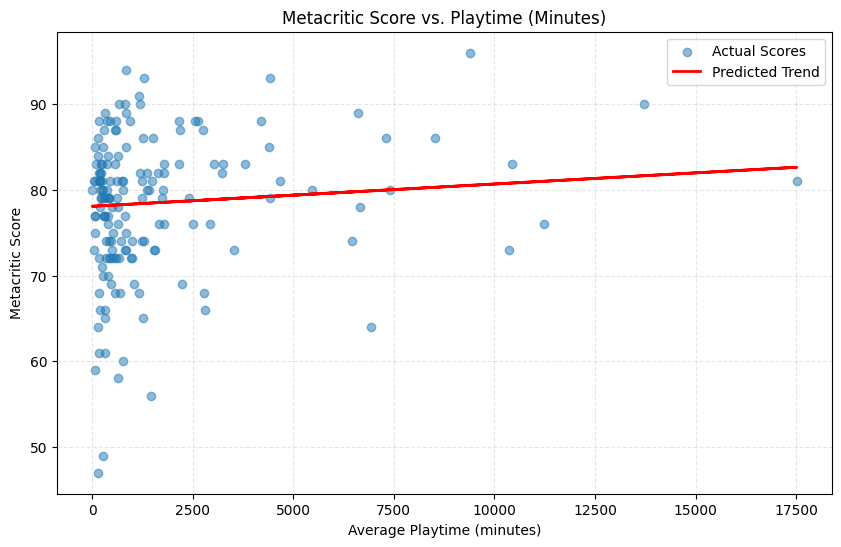

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f} (1.0 = perfect fit)")

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Trend')
plt.xlabel('Average Playtime (minutes)')
plt.ylabel('Metacritic Score')
plt.title('Metacritic Score vs. Playtime (Minutes)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [ ]:
def predict_metacritic_score(playtime_minutes):
    """Predict Metacritic score for a given playtime in minutes."""
    # Convert input to DataFrame with the expected feature name
    input_data = pd.DataFrame({'average_playtime_forever': [playtime_minutes]})
    score = model.predict(input_data)[0]
    return f"Predicted Metacritic score for {playtime_minutes} minutes: {score:.1f}"

# Example predictions (now warning-free)
print(predict_metacritic_score(500))    # ~8 hours
print(predict_metacritic_score(3000))   # 50 hours
print(predict_metacritic_score(10000))  # ~166 hours

Predicted Metacritic score for 500 minutes: 78.2
Predicted Metacritic score for 3000 minutes: 78.9
Predicted Metacritic score for 10000 minutes: 80.7


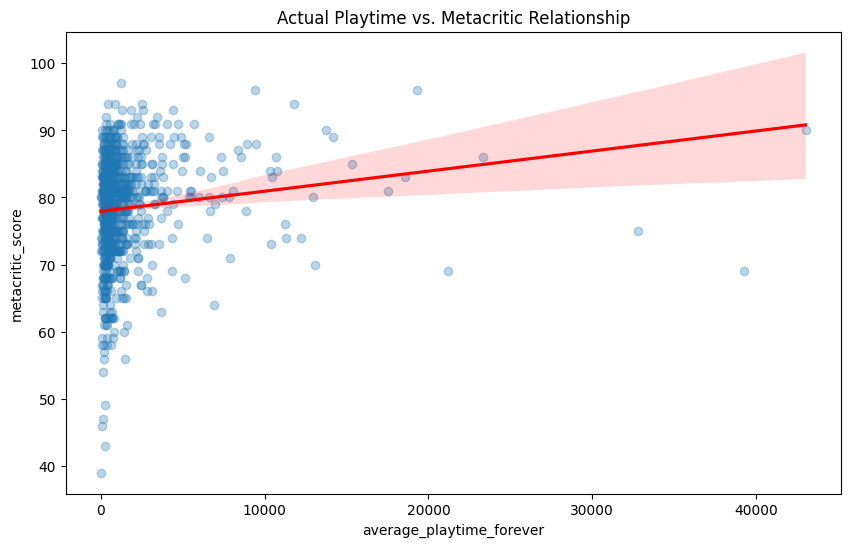

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x='average_playtime_forever', y='metacritic_score', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Actual Playtime vs. Metacritic Relationship')
plt.show()

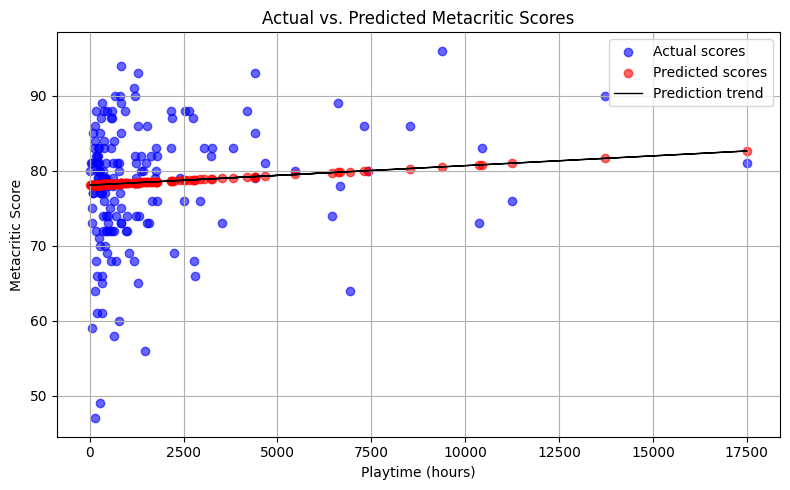

In [ ]:
# Split your data as before (if not already done)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model again (in case this isn't already done)
model = LinearRegression()
model.fit(x_train, y_train)

# Predict using the test set
y_pred = model.predict(x_test)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Actual scores', alpha=0.6)
plt.scatter(x_test, y_pred, color='red', label='Predicted scores', alpha=0.6)
plt.plot(x_test, y_pred, color='black', linewidth=1, label='Prediction trend')

plt.xlabel('Playtime (hours)')
plt.ylabel('Metacritic Score')
plt.title('Actual vs. Predicted Metacritic Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Squared Error: 2018.48
R² Score: -0.34


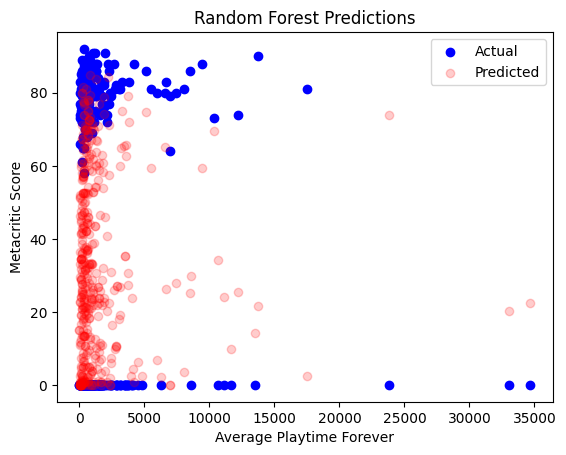

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('small_games_csv.csv')

# Select relevant columns and drop missing values
data = df[['average_playtime_forever', 'metacritic_score']].dropna()

# Define features (X) and target (y)
X = data[['average_playtime_forever']]
y = data['metacritic_score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optional: Plot predicted vs actual
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.2, label='Predicted')
plt.xlabel("Average Playtime Forever")
plt.ylabel("Metacritic Score")
plt.title("Random Forest Predictions")
plt.legend()
plt.show()


Model RMSE: 8.51


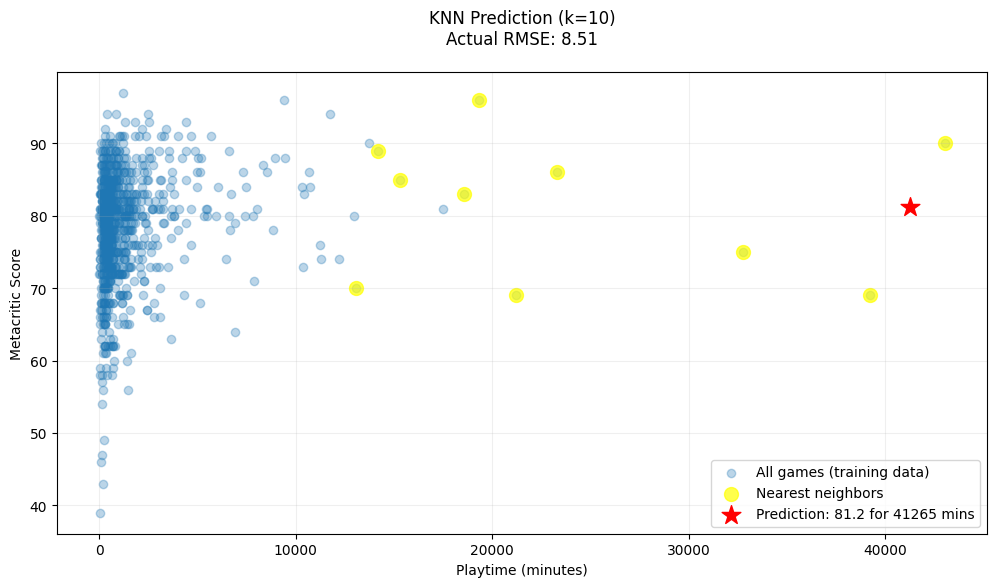

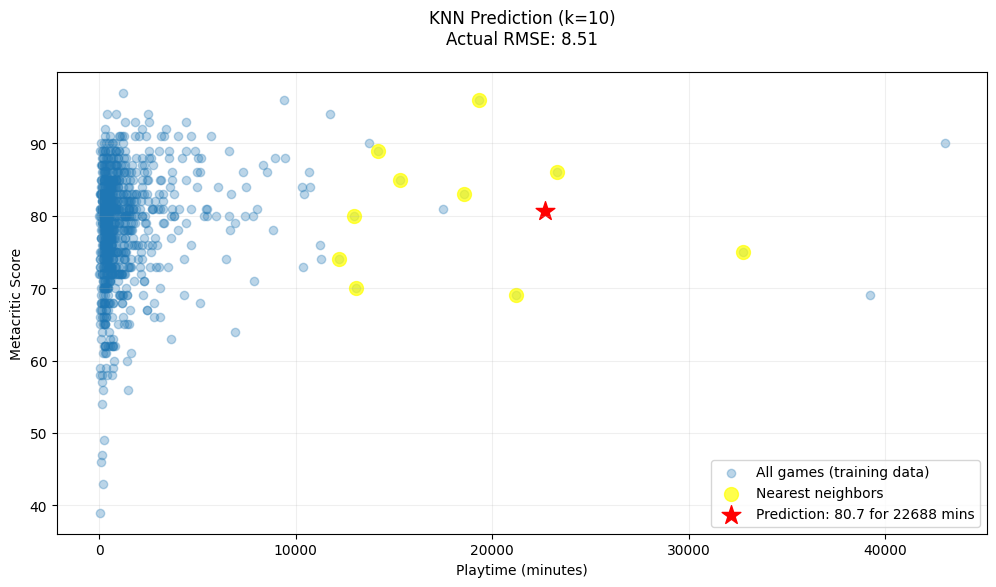

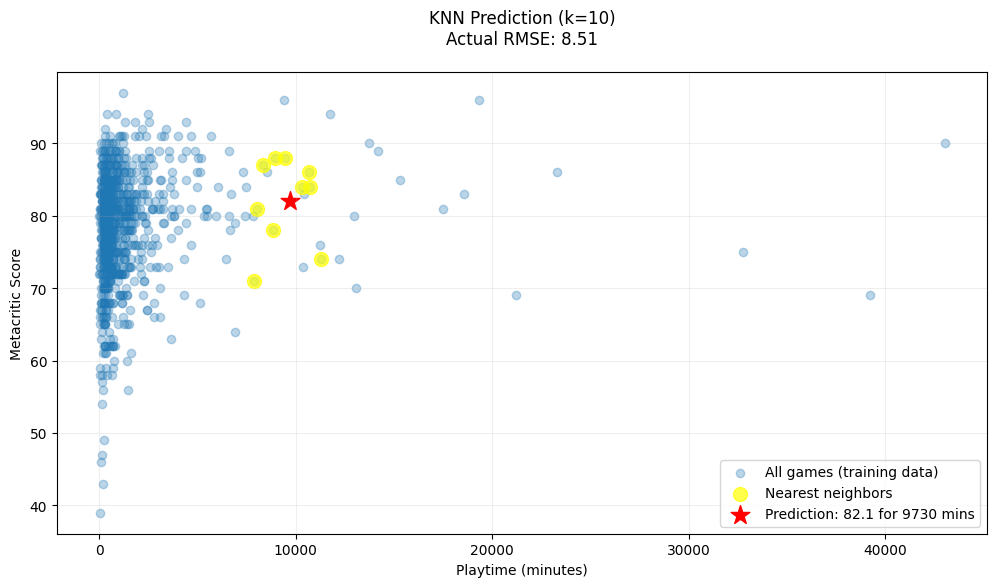

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('small_games_csv.csv')
df = df[(df['average_playtime_forever'] <= 50000) &
        (df['metacritic_score'] > 0)].copy()

# Prepare data with proper feature names
X = df[['average_playtime_forever']]  # Keep as DataFrame to preserve feature name
y = df['metacritic_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Model
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# Evaluation
y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.2f}")

# Enhanced prediction function
def predict_and_visualize():
    """Generate random playtime and predict score with visualization"""
    random_playtime = np.random.randint(0, 50000)

    # Proper prediction format (DataFrame with correct feature name)
    prediction = knn.predict(pd.DataFrame({'average_playtime_forever': [random_playtime]}))[0]

    # Create figure
    plt.figure(figsize=(12, 6))

    # Plot all games
    plt.scatter(X, y, alpha=0.3, label='All games (training data)')

    # Plot the K nearest neighbors used for prediction
    distances, indices = knn.kneighbors(pd.DataFrame({'average_playtime_forever': [random_playtime]}))
    plt.scatter(X_train.iloc[indices[0]], y_train.iloc[indices[0]],
                color='yellow', s=100, alpha=0.7, label='Nearest neighbors')

    # Plot the prediction
    plt.scatter(random_playtime, prediction, color='red', s=200,
                marker='*', label=f'Prediction: {prediction:.1f} for {random_playtime} mins')

    plt.title(f'KNN Prediction (k={knn.n_neighbors})\nActual RMSE: {rmse:.2f}', pad=20)
    plt.xlabel('Playtime (minutes)')
    plt.ylabel('Metacritic Score')
    plt.legend()
    plt.grid(alpha=0.2)
    plt.show()

    return prediction

# Generate 3 predictions with visualization
for _ in range(3):
    predict_and_visualize()